In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import keras
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [2]:
h,w=240,240

def sum_1above(a):
    s=0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            s+=(a[i][j]>1)#[0]+a[i][j][1]+a[i][j][2]>3)
    return s;
    
def best_hist_factor(a):
#     print(sum_1above(a),"\n")
    l,r=0.01,20.00
    for i in range(10):
        mid=(l+r)/2
        m=sum_1above(a*mid)
#         print(mid," - ",m)
#         fig=plt.figure(figsize=(5,5))
#         fig.add_subplot(1,2,1).imshow(a*mid)
#         fig.add_subplot(1,2,2).imshow(a)
        if(m>0.01*h*w*3):
            r=mid-0.001
        else:
            l=mid+0.001
    return mid

In [3]:
import os

x_test=[]
y_test=[]

path_test_low='../dataSets/ref/eval15/low/'
path_test_high='../dataSets/ref/eval15/high/'
    
print('\nLoding Test dataset :')
i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    img_high_path=os.path.join(path_test_high, img)
    
    img_low=load_img(img_low_path, target_size=(h,w))
    img_low=img_to_array(img_low)/255.
    
#     img_low_hsv=cv2.cvtColor(np.array(img_low,dtype=np.uint8),cv2.COLOR_RGB2HSV)
#     img_low_hsv[:,:,2]=best_hist_factor(img_low_hsv[:,:,2]/255.)*img_low_hsv[:,:,2]
#     img_low=cv2.cvtColor(img_low_hsv,cv2.COLOR_HSV2RGB)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.14)+' %',end='\r')
    
    img_high=load_img(img_high_path, target_size=(h,w))
    img_high=img_to_array(img_high)/255.
    

    x_test.append(img_low)
    y_test.append(img_high)

x_test=np.array(x_test, dtype="float32")
y_test=np.array(y_test, dtype="float32")


Loding Test dataset :


In [39]:
def plot_test_n(n):
    fig=plt.figure(figsize=(16,16))
    fig.add_subplot(1,2,1).imshow(x_test[n]*8)
    fig.add_subplot(1,2,2).imshow(y_test[n])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


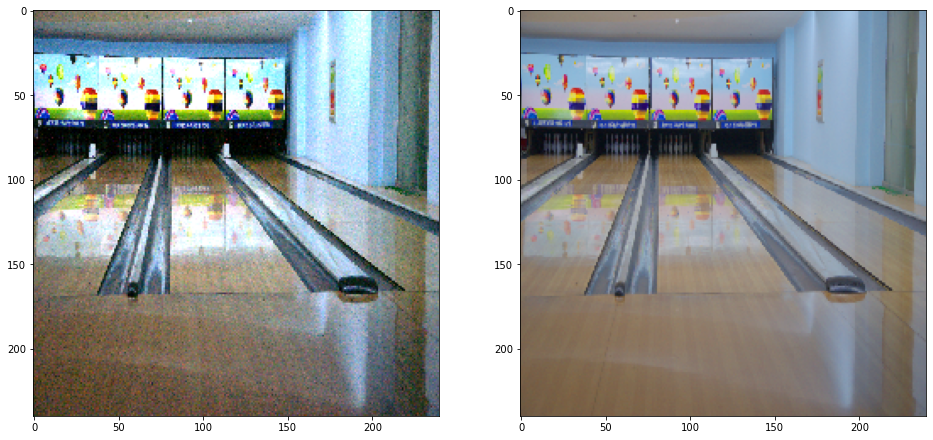

In [40]:
plot_test_n(9)

In [6]:
def plot_hist(img,f):
#     if(f==0):
    img=cv2.cvtColor(np.array(img*255,dtype=np.uint8),cv2.COLOR_RGB2HSV)/255.
#         clahe=cv2.createCLAHE(clipLimit=3.0, tileGridSize=(2,2))
#         img[:,:,2]=clahe.apply(img[:,:,2])
#         img=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)/255.
    h,s,v=cv2.split(img)
    fig=plt.figure(figsize=(16,16))
    fig.add_subplot(4,2,1).imshow(img)
    fig.add_subplot(4,2,2).hist(img.ravel(), bins=256, range=(0.0, 1.0))
    #red
    fig.add_subplot(4,2,3).imshow(h)
    fig.add_subplot(4,2,4).hist(h.ravel(), bins=256, range=(0.0, 1.0))
    #green
    fig.add_subplot(4,2,5).imshow(s)
    fig.add_subplot(4,2,6).hist(s.ravel(), bins=256, range=(0.0, 1.0))
    #blue
#     v=np.power(v,1/3)
    fig.add_subplot(4,2,7).imshow(v)
    fig.add_subplot(4,2,8).hist(v.ravel(), bins=256, range=(0.0, 1.0))

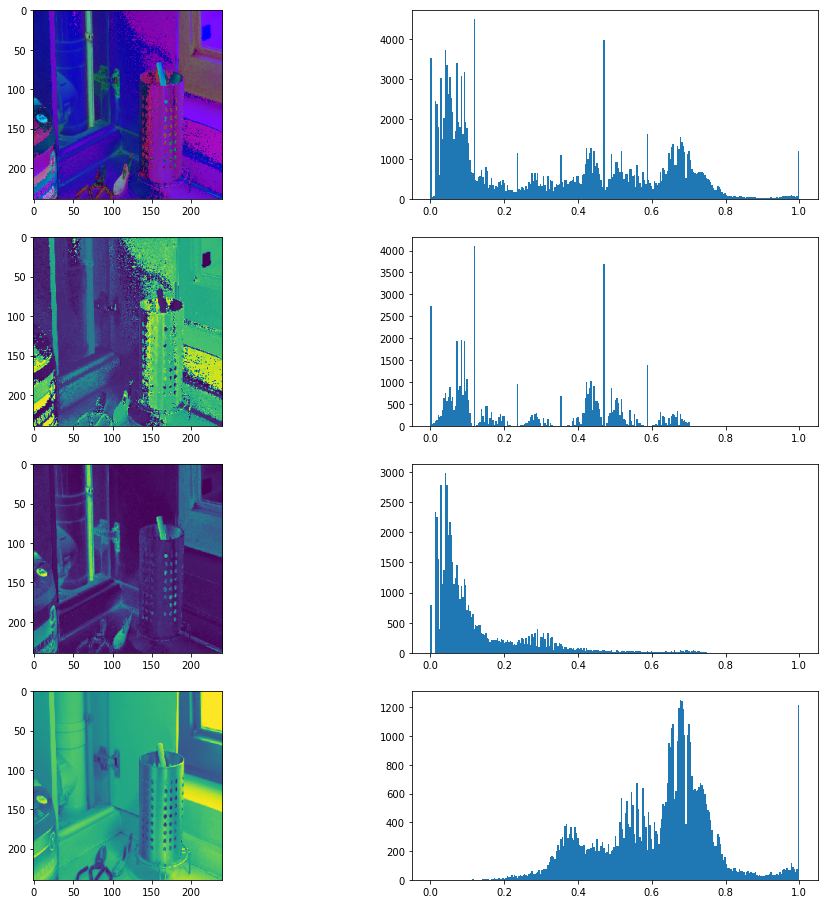

In [7]:
plot_hist(y_test[1],1)

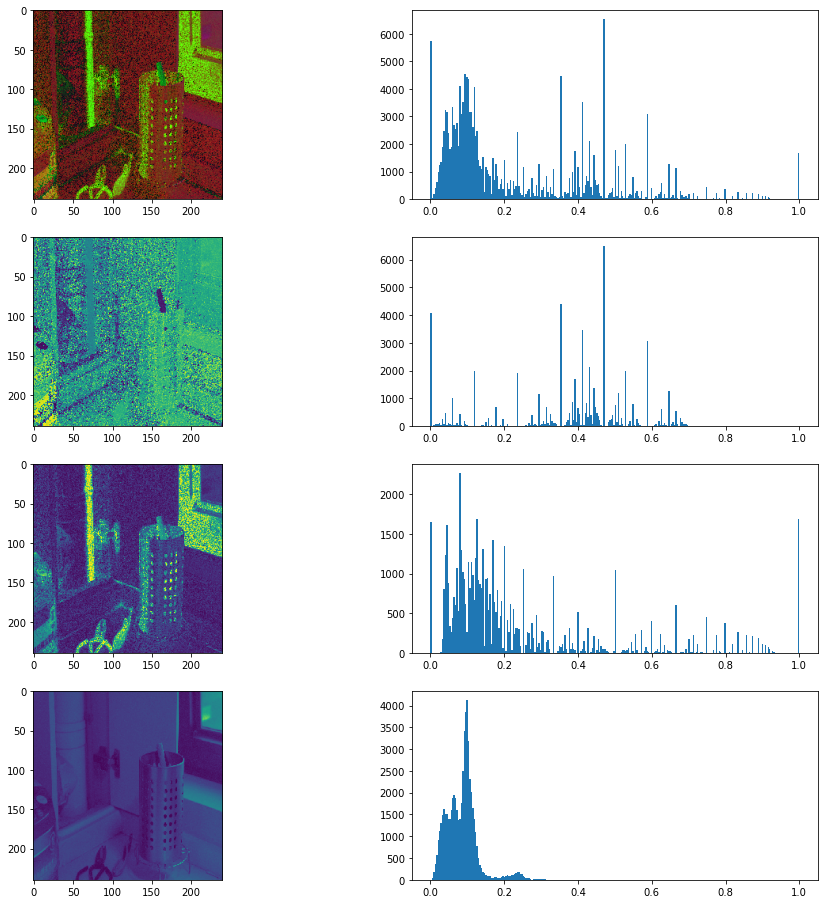

In [8]:
plot_hist(x_test[1],0)

In [9]:
# def plot_hist_equ(img):
#     b,g,r=cv2.split(img)
#     fig=plt.figure(figsize=(16,16))
#     clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     #cl1=clahe.apply(img)
#     fig.add_subplot(4,2,1).imshow(img)
#     fig.add_subplot(4,2,2).imshow(img)
#     #red
#     fig.add_subplot(4,2,3).imshow(r)
#     fig.add_subplot(4,2,4).imshow(cv2.equalizeHist(r))
#     #green
#     fig.add_subplot(4,2,5).imshow(clahe.apply(g))
#     fig.add_subplot(4,2,6).imshow(g)
#     #blue
#     fig.add_subplot(4,2,7).imshow(clahe.apply(b))
#     fig.add_subplot(4,2,8).imshow(b)

In [10]:
# def diff(a1,a2):
#     d=0;
#     for i in range(a1.shape[0]):
#         for j in range(a1.shape[1]):
#             d+=a1[i][j]-a2[i][j]
#     return d
# def min_diff(a1,a2):
#     l,r=0.01,7.00
#     for i in range(100):
#         mid=(l+r)/2
#         d=diff(np.power(a1,mid),a2)
#         fig=plt.figure(figsize=(5,5))
#         fig.add_subplot(1,2,1).imshow(np.power(a1,mid))
#         fig.add_subplot(1,2,2).imshow(a2)
#         print(mid," - ",d)
#         if(d<0):
#             r=mid-0.01
#         else:
#             l=mid+0.01
#     return mid

In [11]:
# img=cv2.cvtColor(x_test[1],cv2.COLOR_RGB2HSV)
# h,s,v=cv2.split(img)
# img=cv2.cvtColor(y_test[1],cv2.COLOR_RGB2HSV)
# h,s,v1=cv2.split(img)

# min_diff(v,v1)

In [12]:
def plot_hsv(img,img1):
    fig=plt.figure(figsize=(16,10))
    fig.add_subplot(2,5,1).imshow(img)
    im=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    print(im.shape)
    h,s,v=cv2.split(im)
    h=cv2.bilateralFilter(h,5,0.1,0.1)
    s=cv2.medianBlur(s,3)
    clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
#     print(v.max(),v.min())
#     v=np.array(clahe.apply(np.array(v*255,dtype=np.uint8))/255.,dtype=np.float32)
    v=np.power(v,1/2)
#     print(v.max())
    
    fig.add_subplot(2,5,2).imshow(h)
    fig.add_subplot(2,5,3).imshow(s)
    fig.add_subplot(2,5,4).imshow(v)
    fig.add_subplot(2,5,5).imshow(cv2.cvtColor(cv2.merge([h,s,v]),cv2.COLOR_HSV2RGB))
    
    
    fig.add_subplot(2,5,6).imshow(img1)
    im1=cv2.cvtColor(img1,cv2.COLOR_RGB2HSV)
    h1,s1,v1=cv2.split(im1)
    
    fig.add_subplot(2,5,7).imshow(h1)
    fig.add_subplot(2,5,8).imshow(s1)
    fig.add_subplot(2,5,9).imshow(v1)
    fig.add_subplot(2,5,10).imshow(cv2.cvtColor(cv2.merge([h1,s1,v1]),cv2.COLOR_HSV2RGB))

(240, 240, 3)


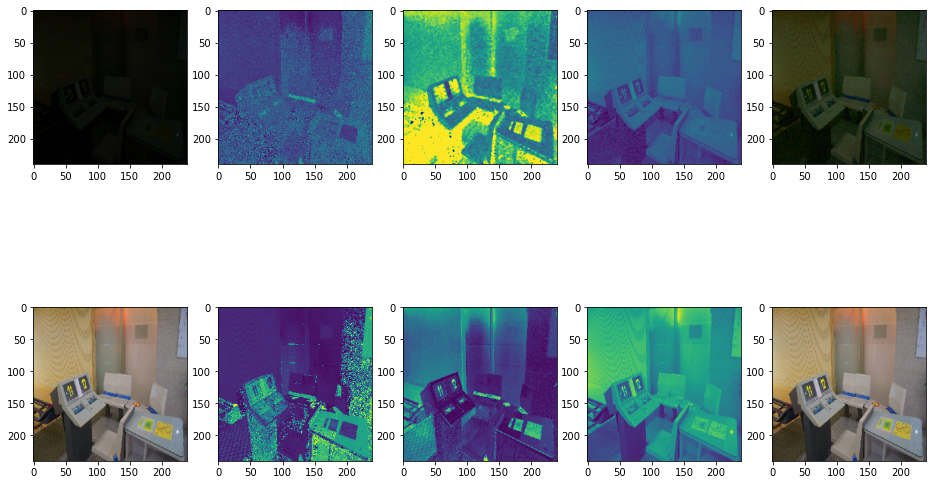

In [13]:
plot_hsv(x_test[8],y_test[8])